Fase 1: Preparación y Exploración Inicial
Revisión de los datos proporcionados

Inspecciona el archivo de datos para familiarizarte con las columnas, formato y estructura.
Carga los datos en un Jupyter Notebook utilizando Pandas.
Haz un resumen básico de las columnas (tipos de datos, valores únicos, tamaños, etc.).

Análisis Exploratorio de Datos (EDA)

Calcula estadísticas descriptivas (media, mediana, desviación estándar).
Crea visualizaciones iniciales: histogramas, gráficos de barras y boxplots para identificar patrones y posibles outliers.
Identifica distribuciones temporales si hay columnas de fechas (e.g., cuándo se realizaron adelantos o pagos).
Análisis de la Calidad de Datos 

Identifica valores faltantes, duplicados e inconsistencias.
Documenta los problemas encontrados y las estrategias de limpieza necesarias.


Fase 2: Limpieza y Preprocesamiento de los Datos
Limpieza de datos

Corrige o elimina datos faltantes, duplicados y valores fuera de rango.
Estandariza formatos de columnas clave, como fechas o categorías.
Creación de cohortes

Define cohortes basadas en la fecha del primer adelanto de efectivo. Agrúpalas según el año/mes/trimestre.


Fase 3: Análisis de Métricas
Cálculo de métricas iniciales

Frecuencia de uso del servicio: Calcula el promedio de uso por usuario y cohorte a lo largo del tiempo.
Tasa de incidentes: Determina qué porcentaje de transacciones presentan problemas por cohorte.
Ingresos generados: Agrega los ingresos por cohorte y analiza la evolución.
Métricas acumuladas: Define y calcula métricas adicionales (como ingresos acumulados por usuario).
Visualización de métricas

Crea gráficos para mostrar la evolución temporal de cada métrica en cada cohorte.
Utiliza gráficos de líneas, heatmaps o diagramas de dispersión según sea necesario.


Fase 4: Modelado Avanzado
Modelos de regresión

Diseña modelos para predecir métricas clave, como ingresos futuros o tasas de uso.
Realiza la búsqueda de hiperparámetros e interpreta los resultados.
Crea visualizaciones, como gráficos de residuos y comparaciones entre predicciones y valores reales.
Modelos de clasificación

Segmenta usuarios según patrones de comportamiento (e.g., usuarios recurrentes vs. esporádicos).
Entrena modelos para clasificar usuarios con base en métricas relevantes.


Fase 5: Documentación y Presentación
Informe del EDA y Calidad de Datos

Resume los hallazgos y acciones tomadas durante el EDA y la limpieza en formato markdown.
Informe de Insights y Modelos

Documenta los insights clave obtenidos de las métricas y el análisis de cohortes.
Explica los modelos creados, sus parámetros y la interpretación de los resultados.
Repositorio GitHub

Organiza el código, datos y documentación en un repositorio estructurado.
Crea un README con los puntos clave del análisis.
Presentación ejecutiva

Diseña una presentación corta y clara con los insights y propuestas más relevantes para los stakeholders.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [3]:
#1-
import pandas as pd

# archivo cashrequest.csv
ruta_archivo = './cashrequest.csv'
data_og = pd.read_csv(ruta_archivo)

datos = data_og.copy()

#comprobar si la cantidad porcentual o fija de comisión depende del tipo de la misma y de la cantidad del préstamo

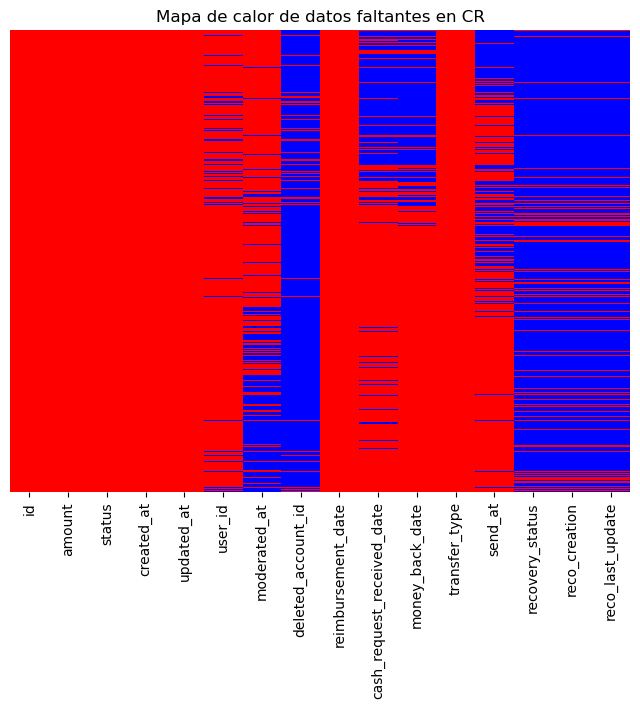

In [4]:
cr_null = datos.isnull()
# Define a custom color map
colors = ["red", "blue"]  # white for False values, bluee for True values
cmap = LinearSegmentedColormap.from_list("custom", colors, N=2)
plt.figure(figsize=(8, 6))
# Crear un mapa de calor de los datos faltantes
sns.heatmap(cr_null, cbar=False, yticklabels=False, cmap=cmap)
plt.title('Mapa de calor de datos faltantes en CR')
plt.show()

In [5]:

# Porcentaje de valores nulos por columna
nulos_porcentaje = datos.isnull().mean() * 100
print(nulos_porcentaje.sort_values(ascending=False))
#Sumas de valors nulos
print(datos.isnull().sum().sort_values(ascending=False))

deleted_account_id            91.222361
recovery_status               86.107635
reco_creation                 86.107635
reco_last_update              86.107635
moderated_at                  33.103880
cash_request_received_date    32.044222
money_back_date               30.984564
send_at                       30.575720
user_id                        8.773467
id                             0.000000
amount                         0.000000
status                         0.000000
created_at                     0.000000
updated_at                     0.000000
reimbursement_date             0.000000
transfer_type                  0.000000
dtype: float64
deleted_account_id            21866
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
moderated_at                   7935
cash_request_received_date     7681
money_back_date                7427
send_at                        7329
user_id                        2103
id                   

In [6]:
missing_user_id = datos[datos['user_id'].isnull()]
missing_user_id.head()


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
7,654,100.0,rejected,2020-02-10 01:11:53.80827+00,2020-02-10 11:53:32.104131+00,NaN,2020-02-10 09:11:21.350695+00,309.0,2020-03-11 01:11:53.80793+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
8,5672,100.0,canceled,2020-06-28 12:06:33.71284+00,2020-06-28 12:06:33.712853+00,NaN,NaN,2499.0,2020-07-07 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
19,545,100.0,rejected,2020-01-29 13:53:03.343598+00,2020-02-08 06:21:16.156719+00,NaN,2020-01-29 14:39:11.563872+00,304.0,2020-02-28 13:53:03.343216+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
21,613,100.0,rejected,2020-02-05 17:37:56.852948+00,2020-02-08 06:21:16.15229+00,NaN,2020-02-06 12:48:09.880702+00,304.0,2020-03-08 17:37:56.842421+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
25,84,100.0,rejected,2019-12-11 07:30:42.567035+00,2020-01-10 16:58:06.837117+00,NaN,2020-01-10 16:58:06.830329+00,91.0,2020-01-10 07:30:42.567035+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [7]:
deleted_user_ids = datos[~datos['deleted_account_id'].isnull()]
deleted_user_ids.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
7,654,100.0,rejected,2020-02-10 01:11:53.80827+00,2020-02-10 11:53:32.104131+00,NaN,2020-02-10 09:11:21.350695+00,309.0,2020-03-11 01:11:53.80793+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
8,5672,100.0,canceled,2020-06-28 12:06:33.71284+00,2020-06-28 12:06:33.712853+00,NaN,NaN,2499.0,2020-07-07 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
19,545,100.0,rejected,2020-01-29 13:53:03.343598+00,2020-02-08 06:21:16.156719+00,NaN,2020-01-29 14:39:11.563872+00,304.0,2020-02-28 13:53:03.343216+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
21,613,100.0,rejected,2020-02-05 17:37:56.852948+00,2020-02-08 06:21:16.15229+00,NaN,2020-02-06 12:48:09.880702+00,304.0,2020-03-08 17:37:56.842421+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
25,84,100.0,rejected,2019-12-11 07:30:42.567035+00,2020-01-10 16:58:06.837117+00,NaN,2020-01-10 16:58:06.830329+00,91.0,2020-01-10 07:30:42.567035+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [8]:
datos_normalizar_account_ids = datos.copy()
datos_normalizar_account_ids[['user_id','deleted_account_id']]


,user_id,deleted_account_id
0,804.0,NaN
1,231.0,NaN
2,191.0,NaN
3,761.0,NaN
4,7686.0,NaN
...,...,...
23965,13681.0,NaN
23966,NaN,30367.0
23967,82122.0,NaN
23968,64517.0,NaN


In [9]:
#ya que por definicion si hay un valor nulo en user_id debería ser(y es) porque el valor está en deleted_account_id, junto los valores en una columna 
#aquí ya podemos ignorar los nulos de deleted_account_id ( o la columna entera)


datos['user_id'] = datos['user_id'].fillna(datos_normalizar_account_ids['deleted_account_id'])
print(datos[datos['user_id'].isnull()])
# Porcentaje de valores nulos por columna
nulos_porcentaje_normalizados = datos.isnull().mean() * 100
print(nulos_porcentaje_normalizados.sort_values(ascending=False))
#Sumas de valors nulos
print(datos_normalizar_account_ids.isnull().sum().sort_values(ascending=False))

Empty DataFrame
Columns: [id, amount, status, created_at, updated_at, user_id, moderated_at, deleted_account_id, reimbursement_date, cash_request_received_date, money_back_date, transfer_type, send_at, recovery_status, reco_creation, reco_last_update]
Index: []
deleted_account_id            91.222361
recovery_status               86.107635
reco_creation                 86.107635
reco_last_update              86.107635
moderated_at                  33.103880
cash_request_received_date    32.044222
money_back_date               30.984564
send_at                       30.575720
id                             0.000000
amount                         0.000000
status                         0.000000
created_at                     0.000000
updated_at                     0.000000
user_id                        0.000000
reimbursement_date             0.000000
transfer_type                  0.000000
dtype: float64
deleted_account_id            21866
recovery_status               20640
reco_creati

In [10]:
# EDA
# Lista de columnas de fechas
columnas_fechas = [
    'created_at', 'updated_at', 'moderated_at', 
    'reimbursement_date', 'cash_request_received_date', 
    'money_back_date', 'send_at', 'reco_creation', 'reco_last_update'
]

# Conversión a datetime
for columna in columnas_fechas:
    datos[columna] = pd.to_datetime(datos[columna], errors='coerce')

# Extraemos características temporales
datos['mes_creacion'] = datos['created_at'].dt.to_period('M')
datos['año_creacion'] = datos['created_at'].dt.to_period('Y')
datos['dia_semana_creacion'] = datos['created_at'].dt.day_name()

# Verificamos la distribución por años y meses
print(datos['año_creacion'].value_counts())
print(datos['mes_creacion'].value_counts())


año_creacion
2020    23680
2019      290
Freq: Y-DEC, Name: count, dtype: int64
mes_creacion
2020-10    7725
2020-09    4221
2020-07    3601
2020-08    3417
2020-06    2615
2020-05     837
2020-04     473
2019-12     289
2020-03     244
2020-01     223
2020-02     184
2020-11     140
2019-11       1
Freq: M, Name: count, dtype: int64


C:\Users\chris\AppData\Local\Temp\ipykernel_6988\1762179991.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  datos['mes_creacion'] = datos['created_at'].dt.to_period('M')
C:\Users\chris\AppData\Local\Temp\ipykernel_6988\1762179991.py:15: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  datos['año_creacion'] = datos['created_at'].dt.to_period('Y')


In [11]:
print(datos['created_at'].min(), datos['created_at'].max())

2019-11-19 13:57:53.511561+00:00 2020-11-01 23:42:30.847066+00:00


In [12]:
#comprobar si hay duplicados en cashrequest
datos.loc[datos.duplicated()]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,mes_creacion,año_creacion,dia_semana_creacion


In [13]:
#comprobar si hay user_id duplicados
datos.loc[datos.duplicated(subset = ['user_id'])]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,mes_creacion,año_creacion,dia_semana_creacion
21,613,100.0,rejected,2020-02-05 17:37:56.852948+00:00,2020-02-08 06:21:16.152290+00:00,304.0,2020-02-06 12:48:09.880702+00:00,304.0,2020-03-08 17:37:56.842421+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2020-02,2020,Wednesday
76,770,60.0,rejected,2020-03-01 00:14:25.915464+00:00,2020-03-01 20:21:23.994827+00:00,865.0,2020-03-01 20:21:23.990717+00:00,NaN,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT,2020-03,2020,Sunday
87,657,100.0,rejected,2020-02-10 15:57:34.916879+00:00,2020-02-10 17:56:31.339773+00:00,939.0,2020-02-10 17:56:31.336071+00:00,NaN,2020-03-11 15:57:34.916568+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2020-02,2020,Monday
91,758,90.0,rejected,2020-02-28 10:51:11.440880+00:00,2020-02-28 14:13:21.504350+00:00,35.0,2020-02-28 14:13:21.501335+00:00,NaN,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT,2020-02,2020,Friday
101,634,100.0,rejected,2020-02-07 16:23:20.317091+00:00,2020-02-11 15:31:18.017298+00:00,317.0,2020-02-07 16:34:40.166419+00:00,317.0,2020-03-08 16:23:20.316590+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2020-02,2020,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23955,6969,100.0,money_back,2020-07-07 18:11:10.840836+00:00,2020-12-18 13:09:33.691723+00:00,17349.0,2020-07-08 13:41:21.995142+00:00,NaN,NaT,2020-07-10,NaT,regular,NaT,NaN,NaT,NaT,2020-07,2020,Tuesday
23960,26969,50.0,direct_debit_sent,2020-11-01 17:31:03.345533+00:00,2021-01-06 09:07:31.575691+00:00,3377.0,NaT,NaN,NaT,2020-11-02,NaT,instant,2020-11-01 17:31:25.526137+00:00,NaN,NaT,NaT,2020-11,2020,Sunday
23964,16834,100.0,money_back,2020-09-19 07:37:14.351567+00:00,2021-02-05 12:11:58.186458+00:00,20064.0,2020-09-19 15:37:54.670099+00:00,NaN,NaT,2020-09-22,2021-02-05 12:11:58.131036+00:00,instant,2020-09-26 07:37:14.299162+00:00,completed,2020-10-15 22:27:12.949488+00:00,2021-02-05 12:11:58.134306+00:00,2020-09,2020,Saturday
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00:00,2021-02-06 20:17:49.292493+00:00,13681.0,NaT,NaN,NaT,2020-10-13,2021-02-06 20:17:49.257521+00:00,instant,2020-10-12 13:54:24.352856+00:00,NaN,NaT,NaT,2020-10,2020,Monday


In [14]:
#cantidad de user_ids
user_id_counts = datos['user_id'].value_counts()
user_id_counts

user_id
2142.0     21
3377.0     19
6334.0     19
13851.0    18
2530.0     17
           ..
93746.0     1
33710.0     1
39090.0     1
82814.0     1
64517.0     1
Name: count, Length: 11793, dtype: int64

In [15]:

unique_user_ids = datos['user_id'].nunique()
unique_user_ids

11793

dia_semana_creacion
Monday       3098
Tuesday      4146
Wednesday    4069
Thursday     3866
Friday       3979
Saturday     2860
Sunday       1952
dtype: int64


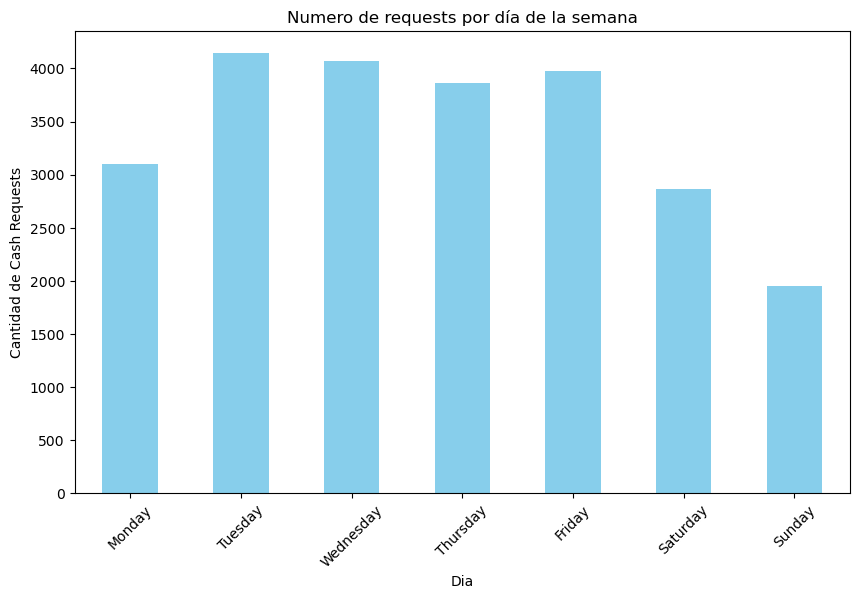

In [16]:
dias_semana_count = datos.groupby(['dia_semana_creacion']).size().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
print(dias_semana_count)
# Plot the cohort analysis by day of the week
plt.figure(figsize=(10, 6))
dias_semana_count.plot(kind='bar', color='skyblue')
plt.title('Numero de requests por día de la semana')
plt.xlabel('Dia')
plt.ylabel('Cantidad de Cash Requests')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Muestra información básica sobre el DataFrame
print(datos.info())
# Estadísticas descriptivas iniciales para columnas numéricas
#print(datos.describe())
# Lista de columnas del DataFrame

# Muestra las primeras y últimas filas para inspección inicial
#print(datos.head())
#print(datos.tail())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  datetime64[ns, UTC]
 5   user_id                     23970 non-null  float64            
 6   moderated_at                15912 non-null  datetime64[ns, UTC]
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          3050 non-null   datetime64[ns, UTC]
 9   cash_request_received_date  16289 non-null  datetime64[ns]     
 10  money_back_date             12040 non-null  datetime64[ns,

In [18]:
def categorize_time_of_day(hour):
    if 7 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

In [19]:
datos['franja_dia'] = datos['created_at'].dt.hour.apply(categorize_time_of_day)
datos['hora_creacion'] = datos['created_at'].dt.hour
datos_franja_dia = datos.groupby('franja_dia').size().sort_values()

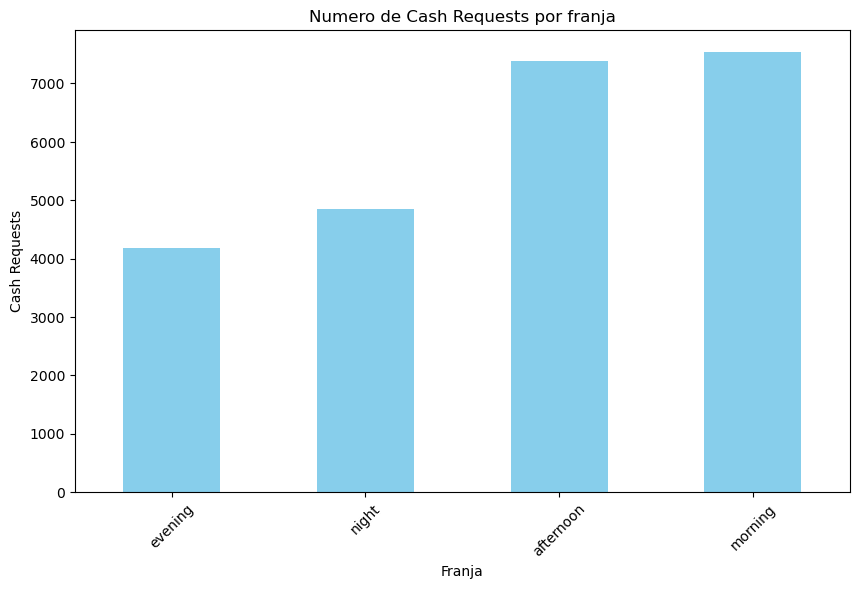

In [20]:
# Plot the cohort analysis by day of the week
plt.figure(figsize=(10, 6))
datos_franja_dia.plot(kind='bar', color='skyblue')
plt.title('Numero de Cash Requests por franja')
plt.xlabel('Franja')
plt.ylabel('Cash Requests')
plt.xticks(rotation=45)
plt.show()

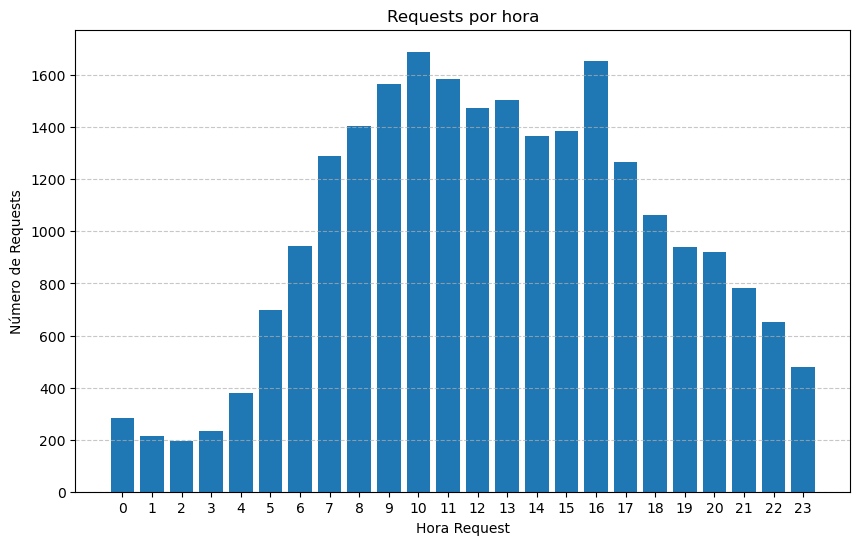

In [21]:
# Group by hour_created 
datos_horas = datos.groupby('hora_creacion').size()
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(datos_horas.index, datos_horas.values)
plt.xlabel('Hora Request')
plt.ylabel('Número de Requests')
plt.title('Requests por hora')
plt.xticks(range(24))  # Show all hours
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1200x800 with 0 Axes>

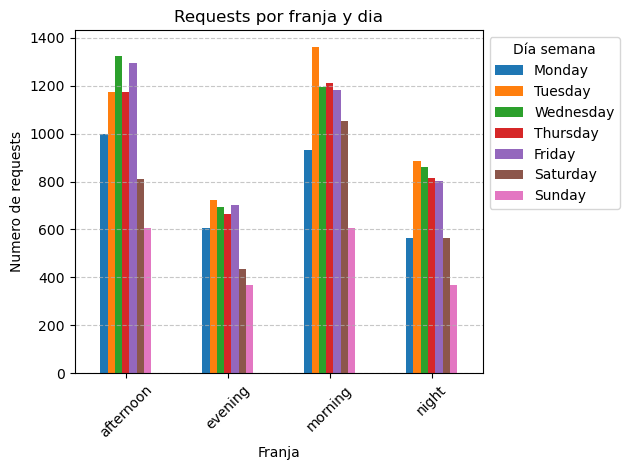

In [22]:
import calendar

# Group the data by time category and day of the week
grouped = datos.groupby(['franja_dia', datos['created_at'].dt.dayofweek]).size().unstack()

# Get weekday names
weekday_names = [calendar.day_name[i] for i in range(7)]

# Plot a grouped bar chart
plt.figure(figsize=(12, 8))
grouped.plot(kind='bar', stacked=False)
plt.xlabel('Franja')
plt.ylabel('Numero de requests')
plt.title('Requests por franja y dia')
plt.xticks(rotation=45)
plt.legend(title='Día semana', labels=weekday_names, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of legend
plt.show()

<Figure size 3000x1500 with 0 Axes>

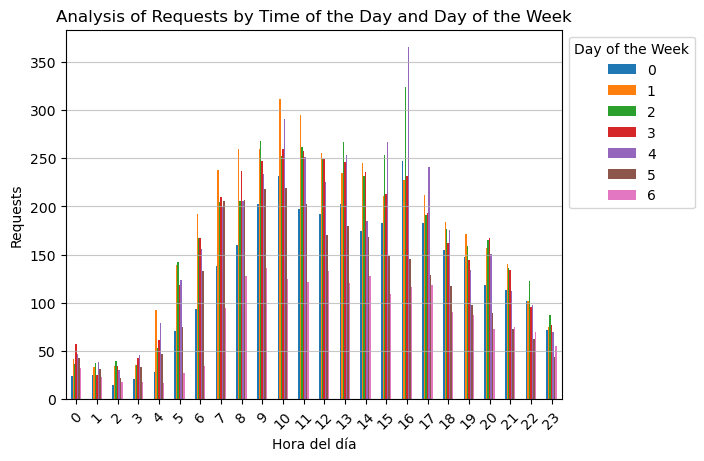

In [23]:
# Group the data by time category and day of the week
grouped = datos.groupby(['hora_creacion', datos['created_at'].dt.dayofweek]).size().unstack()

# Plot a grouped bar chart
plt.figure(figsize=(30, 15))
grouped.plot(kind='bar', stacked=False)
plt.xlabel('Hora del día')
plt.ylabel('Requests')
plt.title('Analysis of Requests by Time of the Day and Day of the Week')
plt.xticks(rotation=45)
plt.legend(title='Day of the Week', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

             amount        user_id
count  23970.000000   23970.000000
mean      82.720818   30570.545265
std       26.528065   27266.706244
min        1.000000      34.000000
25%       50.000000    9269.000000
50%      100.000000   21465.000000
75%      100.000000   43198.500000
max      200.000000  103719.000000


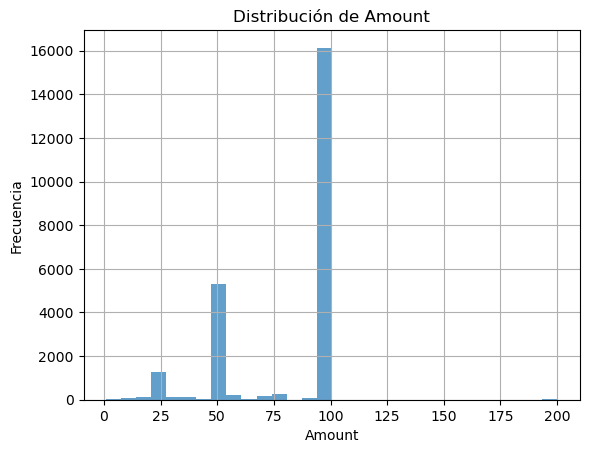

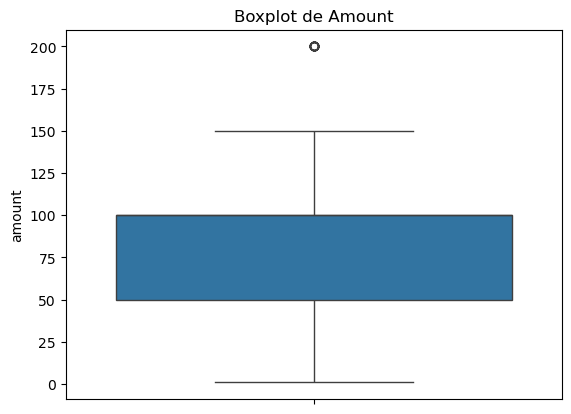

In [24]:
# Estadísticas descriptivas para columnas numéricas
print(datos[['amount', 'user_id']].describe())

# Histograma para 'amount'
datos['amount'].hist(bins=30, alpha=0.7)
plt.title('Distribución de Amount')
plt.xlabel('Amount')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot para identificar outliers
sns.boxplot(data=datos, y='amount')
plt.title('Boxplot de Amount')
plt.show()
#la mayoría de préstamos son de 100 pero hay algunos de 200 y de 1 

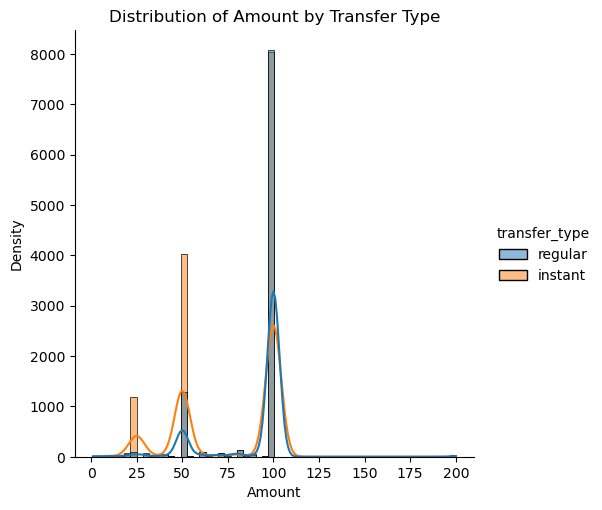

In [25]:
g = sns.displot(data=datos, x="amount", hue="transfer_type", kde=True, multiple="layer")
g.set_axis_labels("Amount", "Density")
#plt.yscale("log")
plt.title("Distribution of Amount by Transfer Type")
plt.show()

status
money_back               16397
rejected                  6568
direct_debit_rejected      831
active                      59
transaction_declined        48
direct_debit_sent           34
canceled                    33
Name: count, dtype: int64


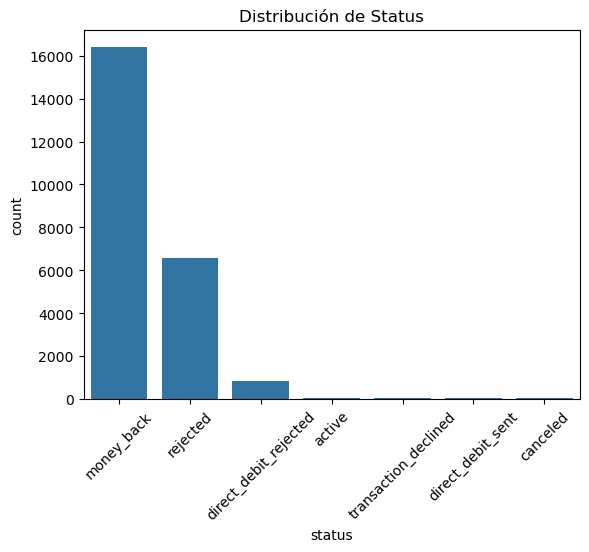

transfer_type
instant    13882
regular    10088
Name: count, dtype: int64


In [26]:
# Conteo de valores únicos para 'status'
print(datos['status'].value_counts())

# Gráfico de barras para 'status'
sns.countplot(data=datos, x='status', order=datos['status'].value_counts().index)
plt.title('Distribución de Status')
plt.xticks(rotation=45)
plt.show()

# Distribución de 'transfer_type'
print(datos['transfer_type'].value_counts())


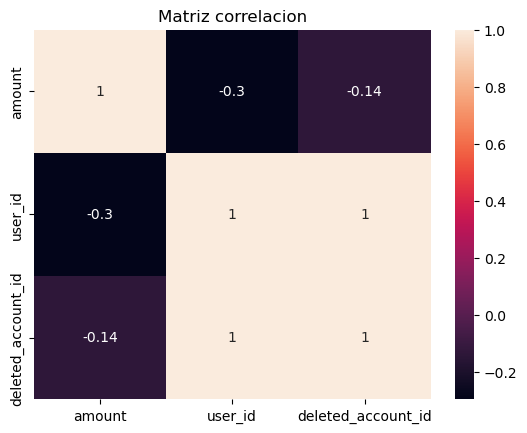

Index(['id', 'amount', 'status', 'created_at', 'updated_at', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update',
       'mes_creacion', 'año_creacion', 'dia_semana_creacion', 'franja_dia',
       'hora_creacion'],
      dtype='object')


In [27]:
#relacion entre variables numéricas
corr = datos[['amount', 'user_id', 'deleted_account_id']].corr()
sns.heatmap(corr,annot=True)
plt.title('Matriz correlacion')
plt.show()

print(datos.columns)

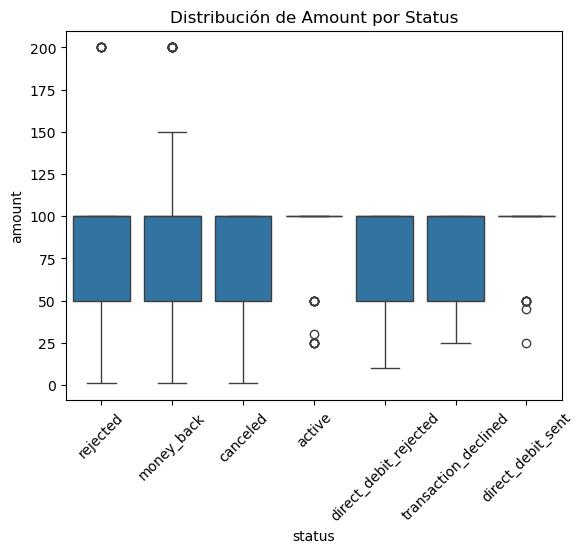

In [28]:
# Relación entre 'amount' y 'status'
sns.boxplot(data=datos, x='status', y='amount')
plt.title('Distribución de Amount por Status')
plt.xticks(rotation=45)
plt.show()


In [29]:
datos.loc[datos.duplicated()]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,mes_creacion,año_creacion,dia_semana_creacion,franja_dia,hora_creacion


In [30]:
# Calcular el rango intercuartílico (IQR)
Q1 = datos['amount'].quantile(0.25)  # Primer cuartil
Q3 = datos['amount'].quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1  # Rango intercuartílico

# Determinar los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = datos[(datos['amount'] < lower_bound) | (datos['amount'] > upper_bound)]

# Filtrar los datos por status
outliers_filtered = outliers[outliers['status'].isin(['rejected','money_back','canceled','active','direct_debit_rejected','transaction_declined','direct_debit_sent'])]

# Mostrar los resultados
print(outliers['status'].value_counts())
print(outliers_filtered[['amount','status']])
print(datos['status'].unique())
'''
Todos los outliers cumplen las siguientes condiciones
-el amount es 200
-El status es rejected o money_back
-el transfer type es regular
'''




status
money_back    18
rejected       7
Name: count, dtype: int64
       amount      status
467     200.0    rejected
557     200.0    rejected
727     200.0    rejected
763     200.0  money_back
980     200.0  money_back
1349    200.0    rejected
1510    200.0  money_back
2282    200.0  money_back
2332    200.0  money_back
3061    200.0    rejected
3221    200.0    rejected
3363    200.0    rejected
5530    200.0  money_back
6083    200.0  money_back
6874    200.0  money_back
6970    200.0  money_back
8333    200.0  money_back
8413    200.0  money_back
8474    200.0  money_back
10302   200.0  money_back
10418   200.0  money_back
11347   200.0  money_back
11469   200.0  money_back
13381   200.0  money_back
17144   200.0  money_back
['rejected' 'money_back' 'canceled' 'active' 'direct_debit_rejected'
 'transaction_declined' 'direct_debit_sent']


'\nTodos los outliers cumplen las siguientes condiciones\n-el amount es 200\n-El status es rejected o money_back\n-el transfer type es regular\n'

In [31]:
#descripcion por status de los outliers
outliers.groupby('status')['amount'].describe()


,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
money_back,18.0,200.0,0.0,200.0,200.0,200.0,200.0,200.0
rejected,7.0,200.0,0.0,200.0,200.0,200.0,200.0,200.0


In [32]:
#comprobación de si hay más registros con un amount igual o mayor al de los outliers conocidos
amount_200 = datos[datos['amount'] >= 200]
print(amount_200['status'].value_counts())
#tipos de transferencia de los valores con 200 de amount(outliers)
amount_200.groupby(['status', 'transfer_type']).size()



status
money_back    18
rejected       7
Name: count, dtype: int64


status      transfer_type
money_back  regular          18
rejected    regular           7
dtype: int64

In [33]:
#outliers agrupoados por transfer_type(todos son Regular) y filtrados por user_id y status
amount_200[['created_at', 'reimbursement_date', 'cash_request_received_date']].drop_duplicates()
amount_200.groupby('transfer_type').size()
amount_200[['user_id','status']].value_counts()

user_id  status    
3557.0   money_back    4
4297.0   money_back    4
3617.0   money_back    3
3808.0   rejected      2
5084.0   rejected      2
9222.0   money_back    2
278.0    money_back    1
4297.0   rejected      1
4302.0   money_back    1
4843.0   rejected      1
4881.0   money_back    1
5104.0   rejected      1
5149.0   money_back    1
9282.0   money_back    1
Name: count, dtype: int64

In [34]:
#creamos usuarios_outliers donde guardamos todos los user_id de los outliers y luego agrupamos por user_id y filtramos por status
usuarios_outliers = datos[datos['user_id'].isin(amount_200['user_id'].unique())]
print(usuarios_outliers.groupby('user_id')['status'].value_counts())
#hay algún user_id null, lo investigamos más adelante

user_id  status    
278.0    money_back    1
3557.0   money_back    5
3617.0   money_back    7
3808.0   rejected      3
4297.0   money_back    6
         rejected      1
4302.0   money_back    1
4843.0   rejected      1
4881.0   money_back    1
         rejected      1
5084.0   rejected      3
5104.0   rejected      1
5149.0   money_back    1
9222.0   money_back    3
9282.0   money_back    1
Name: count, dtype: int64


In [35]:
#mostramos las últimas 20 fechas de creación (created_at) ordenadas àra ver si hay algún patrón en las fechas o algo que nos explique el motivo 
amount_200[['status', 'created_at']].sort_values(by='created_at').head(25)

,status,created_at
5530,money_back,2020-02-26 18:05:27.038373+00:00
6970,money_back,2020-03-02 22:57:48.627582+00:00
6083,money_back,2020-03-11 07:23:35.317042+00:00
557,rejected,2020-03-15 13:45:07.357731+00:00
8474,money_back,2020-04-02 09:15:54.650362+00:00
727,rejected,2020-04-03 06:14:19.552837+00:00
8333,money_back,2020-04-09 06:13:14.269323+00:00
467,rejected,2020-04-11 13:26:58.710517+00:00
6874,money_back,2020-04-22 06:46:57.197984+00:00
8413,money_back,2020-04-26 07:08:40.835512+00:00


In [36]:
#comprobamos los valores nulos de los outliers

amount_200.isnull().sum()
#como nos dimos cuenta anteriormente hay 2 user_id nulos, ya no los hay porque hemos normalizado user_id y deleted_account_id 

id                             0
amount                         0
status                         0
created_at                     0
updated_at                     0
user_id                        0
moderated_at                   0
deleted_account_id            23
reimbursement_date            18
cash_request_received_date     7
money_back_date               10
transfer_type                  0
send_at                       25
recovery_status               24
reco_creation                 24
reco_last_update              24
mes_creacion                   0
año_creacion                   0
dia_semana_creacion            0
franja_dia                     0
hora_creacion                  0
dtype: int64

In [37]:
#mostramos los user_id nulos
user_id_nulo = amount_200[amount_200['user_id'].isnull()]
print(user_id_nulo)
#vemos que ambos tienen deleted_account_id 3808, lo cual es sospechoso ya que según lexique.xlsx user_id debería reemplazarse con deleted_account_id y, además, son la misma id pese a que deberían ser únicos
#If a user delete his account, we are replacing the user_id by this id. It corresponds to a unique ID in the deleted account table with some keys information saved for fraud-fighting purposes (while respecting GDPR regulation)


Empty DataFrame
Columns: [id, amount, status, created_at, updated_at, user_id, moderated_at, deleted_account_id, reimbursement_date, cash_request_received_date, money_back_date, transfer_type, send_at, recovery_status, reco_creation, reco_last_update, mes_creacion, año_creacion, dia_semana_creacion, franja_dia, hora_creacion]
Index: []

[0 rows x 21 columns]


In [38]:
#comprobamos cuántos de los registros con 'reimbursement_date' nulo están rejected
print(amount_200[amount_200['reimbursement_date'].isnull()]['status'].value_counts())
#hay 5 rejected



status
money_back    13
rejected       5
Name: count, dtype: int64


In [39]:
 #intentamos comprobar si hay algún patrón en los registros con el campo nulo
print(amount_200[amount_200['cash_request_received_date'].isnull()])

        id  amount    status                       created_at  \
467   1140   200.0  rejected 2020-04-11 13:26:58.710517+00:00   
557    885   200.0  rejected 2020-03-15 13:45:07.357731+00:00   
727   1032   200.0  rejected 2020-04-03 06:14:19.552837+00:00   
1349  3575   200.0  rejected 2020-06-17 01:10:51.553474+00:00   
3061  8659   200.0  rejected 2020-07-17 12:57:31.472230+00:00   
3221  7401   200.0  rejected 2020-07-09 21:54:35.238416+00:00   
3363  8958   200.0  rejected 2020-07-19 15:41:31.640664+00:00   

                           updated_at  user_id  \
467  2020-04-13 08:53:52.235216+00:00   5104.0   
557  2020-03-15 16:05:00.702821+00:00   4297.0   
727  2020-04-03 09:42:05.536879+00:00   4843.0   
1349 2020-06-17 10:44:56.575810+00:00   5084.0   
3061 2020-07-17 13:28:41.736284+00:00   5084.0   
3221 2020-07-10 06:49:22.977482+00:00   3808.0   
3363 2020-07-20 13:09:32.152430+00:00   3808.0   

                         moderated_at  deleted_account_id  \
467  2020-04-13 0

In [40]:
print(amount_200[amount_200['money_back_date'].isnull()]['status'].value_counts())


status
rejected      7
money_back    3
Name: count, dtype: int64


In [41]:
#Los registros con este campo nulo podrían corresponder a solicitudes que nunca se enviaron, ya sea porque fueron rechazadas (rejected) o por un error en el sistema.
print(amount_200[amount_200['send_at'].isnull()])


         id  amount      status                       created_at  \
467    1140   200.0    rejected 2020-04-11 13:26:58.710517+00:00   
557     885   200.0    rejected 2020-03-15 13:45:07.357731+00:00   
727    1032   200.0    rejected 2020-04-03 06:14:19.552837+00:00   
763    1967   200.0  money_back 2020-05-18 07:57:49.949907+00:00   
980    1732   200.0  money_back 2020-05-13 14:13:57.448290+00:00   
1349   3575   200.0    rejected 2020-06-17 01:10:51.553474+00:00   
1510   2099   200.0  money_back 2020-05-21 12:53:43.630055+00:00   
2282   1556   200.0  money_back 2020-05-05 05:17:40.784144+00:00   
2332   2184   200.0  money_back 2020-05-26 14:35:16.092311+00:00   
3061   8659   200.0    rejected 2020-07-17 12:57:31.472230+00:00   
3221   7401   200.0    rejected 2020-07-09 21:54:35.238416+00:00   
3363   8958   200.0    rejected 2020-07-19 15:41:31.640664+00:00   
5530    737   200.0  money_back 2020-02-26 18:05:27.038373+00:00   
6083    843   200.0  money_back 2020-03-11 07:23

In [42]:
#comprobamos si los registros sin datos de recovery están asociados a un único status
print(amount_200[amount_200['recovery_status'].isnull()]['status'].value_counts())


status
money_back    17
rejected       7
Name: count, dtype: int64


In [43]:
nulos_vs_no_nulos = amount_200.assign(nulos=amount_200.isnull().sum(axis=1)).groupby('status')['nulos'].mean()
print(nulos_vs_no_nulos)


status
money_back    5.722222
rejected      7.428571
Name: nulos, dtype: float64


C:\Users\chris\AppData\Local\Temp\ipykernel_6988\2816906368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rejected_nulos['created_at'] = pd.to_datetime(rejected_nulos['created_at'])


<Axes: xlabel='created_at'>

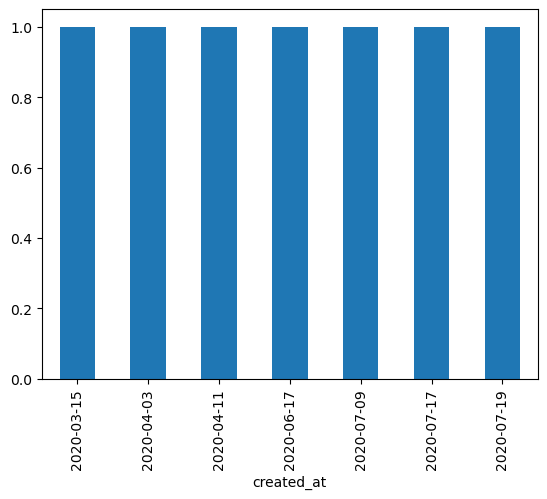

In [44]:
rejected_nulos = amount_200[amount_200['status'] == 'rejected']
rejected_nulos['created_at'] = pd.to_datetime(rejected_nulos['created_at'])
rejected_nulos['created_at'].dt.date.value_counts().sort_index().plot(kind='bar')


Puede haberse tratado de un pico de actividad en julio de 2020 que generó transacciones erróneas o incompletas.

<Axes: xlabel='mes_creacion,año_creacion'>

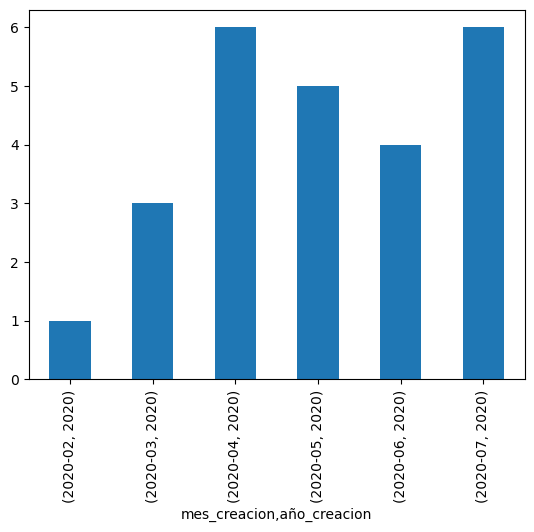

In [46]:
#comparación de volumen de transacciones en julio con otros meses
amount_200.groupby(['mes_creacion', 'año_creacion'])['id'].count().plot(kind='bar')


In [47]:
sin_recuperacion = amount_200[amount_200['recovery_status'].isnull()]
print(sin_recuperacion['status'].value_counts())



status
money_back    17
rejected       7
Name: count, dtype: int64


El valor de 200 podría estar predeterminado en el sistema como un límite de prueba o un valor estándar para ciertos procesos automatizados relacionados con devoluciones y rechazos.

In [49]:
'''
#Analizamos otros valores atípicos (por ejemplo, fuera del rango de los percentiles 5 y 95) para ver si hay más registros con patrones similares.
# Calculamos los percentiles 5 y 95
percentil_5 = datos['amount'].quantile(0.5)
percentil_95 = datos['amount'].quantile(0.95)

# Filtramos los valores fuera del rango de los percentiles 5 y 95
outliers_percentiles = datos[(datos['amount'] < percentil_5)]

# Vemos cuántos registros fuera de los percentiles existen
print(f"Registros fuera de los percentiles 5-95: {outliers_percentiles.shape[0]}")

# Vemos los valores atípicos y sus patrones
print(outliers_percentiles[['amount', 'status', 'user_id', 'created_at']].head())
'''


'\n#Analizamos otros valores atípicos (por ejemplo, fuera del rango de los percentiles 5 y 95) para ver si hay más registros con patrones similares.\n# Calculamos los percentiles 5 y 95\npercentil_5 = datos[\'amount\'].quantile(0.5)\npercentil_95 = datos[\'amount\'].quantile(0.95)\n\n# Filtramos los valores fuera del rango de los percentiles 5 y 95\noutliers_percentiles = datos[(datos[\'amount\'] < percentil_5)]\n\n# Vemos cuántos registros fuera de los percentiles existen\nprint(f"Registros fuera de los percentiles 5-95: {outliers_percentiles.shape[0]}")\n\n# Vemos los valores atípicos y sus patrones\nprint(outliers_percentiles[[\'amount\', \'status\', \'user_id\', \'created_at\']].head())\n'

In [50]:
# Ver los registros con 'amount' bajo (por ejemplo, 1 o 20)
low_amount_outliers = outliers_percentiles[outliers_percentiles['amount'] <= 1]
print(low_amount_outliers[['amount', 'status', 'user_id', 'created_at']])


NameError: name 'outliers_percentiles' is not defined

In [ ]:
high_low_values = pd.concat([amount_200,low_amount_outliers])

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# Aseguramos que 'created_at' sea de tipo datetime
high_low_values.loc[:, 'created_at'] = pd.to_datetime(high_low_values['created_at'])

# Agrupar y contar la cantidad de registros por fecha de creación
high_low_values.groupby(high_low_values['created_at'].dt.date)['amount'].count().plot(kind='bar', figsize=(12, 6))

# Ajustar el eje X para mejorar la visibilidad de las fechas
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10))  # Ajusta el número de barras de fechas
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Formato compacto para las fechas
plt.xticks(rotation=45)  # Rota las etiquetas de las fechas para evitar solapamientos

# Agregar título y etiquetas
plt.title('Distribución de registros atípicos por fecha de creación')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de registros')

# Mostrar el gráfico con un buen ajuste
plt.tight_layout()
plt.show()


In [ ]:
# Ver distribución de fechas de creación
# Usar .loc para modificar de forma segura
high_low_values.loc[:, 'created_at'] = pd.to_datetime(high_low_values['created_at'])

#outliers_percentiles['created_at'] = pd.to_datetime(outliers_percentiles['created_at'])
high_low_values.groupby(high_low_values['created_at'].dt.date)['amount'].count().plot(kind='bar')
plt.title('Distribución de registros atípicos por fecha de creación')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de registros')
plt.show()





In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(12, 6))
sns.lineplot(x='created_at', y='amount', data=high_low_values)

# Ajustar el eje X para controlar la cantidad de etiquetas
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=15))  # Controla el número de fechas mostradas
plt.xticks(rotation=45)  # Rotar las etiquetas para evitar solapamientos
plt.title('Cantidad de los registros fuera del rango de los percentiles (5-95%)')
plt.xlabel('Fecha de Creación')
plt.ylabel('Cantidad')
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
'''
Dado que ambas columnas están relacionadas y complementan información sobre fechas clave del reembolso, 
podriamos combinarlas en una sola columna para simplificar el análisis.
'''
datos['final_reimbursement_date'] = datos.apply(
    lambda row: row['money_back_date'] if pd.notna(row['money_back_date']) else row['reimbursement_date'],
    axis=1
)

In [ ]:

#imputación estratégica:creo que pueden tener relevancia en el análisis, así que imputamos con una nueva categoría ('Desconocido' para categóricos).
#se podrían borrar las columnas si finalmente no aportan nada
'''
datos['deleted_account_id'] = datos['deleted_account_id'].fillna('Desconocido')
datos['reimbursement_date'] = datos['reimbursement_date'].fillna('Desconocido')
datos['recovery_status'] = datos['recovery_status'].fillna('Desconocido')
datos['reco_creation'] = datos['reco_creation'].fillna('Desconocido')
datos['reco_last_update'] = datos['reco_last_update'].fillna('Desconocido')
'''
#columnas con menos nulos

# Comprobación de si reimbursement_date y money_back_date son complementarios
reimbursement_no_nulos = datos['reimbursement_date']
money_back_no_nulos = datos['money_back_date']

print("Reimbursement Date (no nulos):")
print(reimbursement_no_nulos)

print("\nMoney Back Date (no nulos):")
print(money_back_no_nulos)

ambas_no_nulas = datos[~datos['reimbursement_date'].isna() & ~datos['money_back_date'].isna()]
ambas_nulas = datos[datos['reimbursement_date'].isna() & datos['money_back_date'].isna()]

print(f"Ambas columnas no nulas: {len(ambas_no_nulas)}")
print(f"Ambas columnas nulas: {len(ambas_nulas)}")

coinciden = datos[~datos['reimbursement_date'].isna() & ~datos['money_back_date'].isna()]
fechas_iguales = (coinciden['reimbursement_date'] == coinciden['money_back_date']).sum()

print(f"Coincidencias exactas: {fechas_iguales}")
print(f"Diferencias: {len(coinciden) - fechas_iguales}")

solo_reimbursement = datos[~datos['reimbursement_date'].isna() & datos['money_back_date'].isna()]
solo_money_back = datos[datos['reimbursement_date'].isna() & ~datos['money_back_date'].isna()]

print(f"Solo reimbursement_date tiene datos: {len(solo_reimbursement)}")
print(f"Solo money_back_date tiene datos: {len(solo_money_back)}")

#Comprobar si deleted_account_id y user_id coinciden cuando deleted_account_id no es nulo

In [ ]:
#definición de cohortes
#obtenemos la primera fecha de cada usuario, agrupamos por user_id y utilizamos el campo 'created_at'
datos['created_at'] = pd.to_datetime(datos['created_at'])
primer_adelanto = datos.groupby('user_id')['created_at'].min().reset_index()
primer_adelanto.rename(columns={'created_at': 'fecha_primer_adelanto'}, inplace=True)



In [ ]:
#asignamos cohorte por mes en una columna 'cohorte_mensual'
primer_adelanto['cohorte_mensual'] = primer_adelanto['fecha_primer_adelanto'].dt.to_period('M')
datos_cohortes = datos.merge(primer_adelanto[['user_id', 'cohorte_mensual']], on='user_id', how='left')
print(datos_cohortes[['user_id', 'created_at', 'cohorte_mensual']].head())

In [ ]:
#mostrar cohortes únicos
cohortes_unicas = sorted(datos_cohortes['cohorte_mensual'].unique())
print(cohortes_unicas)
#vemos que las fechas están dentro del máximo y mínimo de la comprobación anterior min 2019-11 - max 2020-11

In [ ]:
#Una vez definidos los cohortes, podemos comenzar a analizarlos



In [ ]:
#Frecuencia de uso
frecuencia_uso_mensual = datos_cohortes.groupby('cohorte_mensual')['user_id'].count().reset_index()
frecuencia_uso_mensual.rename(columns={'user_id': 'frecuencia_uso'}, inplace=True)
print(frecuencia_uso_mensual)


In [ ]:
#graficamos
import matplotlib.pyplot as plt
frecuencia_uso_mensual.plot(x='cohorte_mensual', y='frecuencia_uso', kind='bar', figsize=(10, 5))
plt.title('Frecuencia de Uso por Cohorte Mensual')
plt.ylabel('Número de Adelantos')
plt.xlabel('cohorte_mensual')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#tasa de incidentes mensuales
incidentes = datos_cohortes[datos_cohortes['status'].isin(['transaction_declined', 'direct_debit_rejected'])]
tasa_incidentes_mensuales = incidentes.groupby('cohorte_mensual')['user_id'].count() / datos_cohortes.groupby('cohorte_mensual')['user_id'].count()
tasa_incidentes_mensuales = tasa_incidentes_mensuales.reset_index()
tasa_incidentes_mensuales.columns = ['cohorte_mensual', 'tasa_incidentes_mensuales']  # Renombrar columnas
print(tasa_incidentes_mensuales)
#en el cohorte 2019-11 hay una tasa de incidentes nan

In [ ]:
#graficamos
import matplotlib.pyplot as plt
tasa_incidentes_mensuales.plot(x='cohorte_mensual', y='tasa_incidentes_mensuales', kind='bar', figsize=(10, 5))
plt.title('Tasa de Incidentes por Cohorte')
plt.ylabel('Tasa Incidentes')
plt.xlabel('Cohorte')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#ingresos generados por cohorte
ingresos_mensuales = datos_cohortes.groupby('cohorte_mensual')['amount'].sum().reset_index()
#ingresos_mensuales.rename(columns={'amount': 'amount'}, inplace=True)
print(ingresos_mensuales)

In [ ]:
#graficamos
import matplotlib.pyplot as plt
ingresos_mensuales.plot(x='cohorte_mensual', y='amount', kind='bar', figsize=(10, 5))
plt.title('Tasa de amount por Cohorte Mensual')
plt.ylabel('Tasa ingresos')
plt.xlabel('Cohorte')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Convertir la cohorte mensual a tipo datetime para convertirla en trimestral
datos_cohortes['fecha_primer_adelanto'] = datos_cohortes['cohorte_mensual'].dt.to_timestamp()

# Convertir a cohorte trimestral
datos_cohortes['cohorte_trimestral'] = datos_cohortes['fecha_primer_adelanto'].dt.to_period('Q')

# Verificar las cohortes trimestrales
cohortes_trimestrales = datos_cohortes[['user_id', 'cohorte_mensual', 'cohorte_trimestral']].drop_duplicates()
print(cohortes_trimestrales)


In [ ]:
#Frecuencia de uso trimestral
frecuencia_uso_trimestral = cohortes_trimestrales.groupby('cohorte_trimestral')['user_id'].count().reset_index()
frecuencia_uso_trimestral.rename(columns={'user_id': 'frecuencia_uso_trimestral'}, inplace=True)
print(frecuencia_uso_trimestral.info())


In [ ]:
#Convertimos las columnas de cohortes a datetime para poder graficar
frecuencia_uso_trimestral['cohorte_trimestral'] = frecuencia_uso_trimestral['cohorte_trimestral'].dt.to_timestamp()
frecuencia_uso_mensual['cohorte_mensual'] = frecuencia_uso_mensual['cohorte_mensual'].dt.to_timestamp()

In [ ]:
print(frecuencia_uso_trimestral.info())
print(frecuencia_uso_mensual.info())

In [ ]:
#graficamos frequencia de uso mensual vs trimestral
plt.figure(figsize=(12, 6))
sns.lineplot(x='cohorte_mensual', y='frecuencia_uso', data=frecuencia_uso_mensual, label='Mensual', marker='o')
sns.lineplot(x='cohorte_trimestral', y='frecuencia_uso_trimestral', data=frecuencia_uso_trimestral, label='Trimestral', marker='o')

# Configuración del gráfico
plt.title('Comparación de la  frequencia de uso: Cohortes Mensuales vs Trimestrales')
plt.xlabel('Cohorte (Mes/Trimestre)')
plt.ylabel('Frequencia de uso')
plt.legend(title='Tipo de Cohorte')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Mostrar gráfico
plt.show()

In [ ]:
#tasa incidentes trimestrales:
#Es 'canceled' una incidencia?
incidentes_trimestrales = cohortes_trimestrales[datos_cohortes['status'].isin(['transaction_declined', 'direct_debit_rejected'])]
tasa_incidentes_trimestrales = incidentes_trimestrales.groupby('cohorte_trimestral')['user_id'].count() / datos_cohortes.groupby('cohorte_trimestral')['user_id'].count()
tasa_incidentes_trimestrales = tasa_incidentes_trimestrales.reset_index()
tasa_incidentes_trimestrales.columns = ['cohorte_trimestral', 'tasa_incidentes_trimestrales']  # Renombrar columnas
print(tasa_incidentes_trimestrales)

In [ ]:
#ingresos generados por cohorte trimestral cohortes_trimestrales
ingresos_trimestrales = datos_cohortes.groupby('cohorte_trimestral')['amount'].sum().reset_index()
ingresos_trimestrales.rename(columns={'amount': 'ingresos_totales_trimestrales'}, inplace=True)
print(ingresos_trimestrales)

In [ ]:
#Convertimos las columnas de cohortes a datetime para poder graficar
ingresos_mensuales['cohorte_mensual'] = ingresos_mensuales['cohorte_mensual'].dt.to_timestamp()


In [ ]:
ingresos_trimestrales['cohorte_trimestral'] = ingresos_trimestrales['cohorte_trimestral'].dt.to_timestamp()

In [ ]:
ingresos_mensuales.info()
ingresos_trimestrales.info()

In [ ]:
#graficamos ingresos mensual vs trimestral
plt.figure(figsize=(12, 6))
sns.lineplot(x='cohorte_mensual', y='ingresos_totales', data=ingresos_mensuales, label='Mensual', marker='o')
sns.lineplot(x='cohorte_trimestral', y='ingresos_totales_trimestrales', data=ingresos_trimestrales, label='Trimestral', marker='o')

# Configuración del gráfico
plt.title('Comparación de ingresos: Cohortes Mensuales vs Trimestrales')
plt.xlabel('Cohorte (Mes/Trimestre)')
plt.ylabel('Ingresos')
plt.legend(title='Tipo de Cohorte')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Mostrar gráfico
plt.show()

In [ ]:
#Convertimos las columnas de cohortes a datetime para poder graficar
tasa_incidentes_mensuales = tasa_incidentes_mensuales.dropna()
tasa_incidentes_mensuales['cohorte_mensual'] = tasa_incidentes_mensuales['cohorte_mensual'].dt.to_timestamp()

In [ ]:
print(tasa_incidentes_mensuales.info())

In [ ]:
#Convertimos las columnas de cohortes a datetime para poder graficar
tasa_incidentes_trimestrales['cohorte_trimestral'] = tasa_incidentes_trimestrales['cohorte_trimestral'].dt.to_timestamp()

In [ ]:
print(tasa_incidentes_trimestrales.info())

In [ ]:
'''plt.figure(figsize=(12, 6))
sns.lineplot(x='cohorte_mensual', y='tasa_incidentes_mensuales', data=tasa_incidentes_mensuales, label='Mensual', marker='o')
plt.title('Tasa de Incidentes Mensuales')
plt.xlabel('Cohorte Mensual')
plt.ylabel('Tasa de Incidentes')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
'''

In [ ]:
#graficamos tasa incidentes mensual vs trimestral
plt.figure(figsize=(12, 6))
sns.lineplot(x='cohorte_mensual', y='tasa_incidentes_mensuales', data=tasa_incidentes_mensuales, label='Mensual', marker='o')
sns.lineplot(x='cohorte_trimestral', y='tasa_incidentes_trimestrales', data=tasa_incidentes_trimestrales, label='Trimestral', marker='o')

# Configuración del gráfico
plt.title('Comparación de la tasa de incidentes: Cohortes Mensuales vs Trimestrales')
plt.xlabel('Cohorte (Mes/Trimestre)')
plt.ylabel('Tasa de Incidentes')
plt.legend(title='Tipo de Cohorte')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [ ]:
#Métricas acumuladas
#Tasa acumulada de incidentes


In [ ]:
# archivo extractfees.csv
ruta_archivo = './extractfees.csv'
datos = pd.read_csv(ruta_archivo)
# Muestra información básica sobre el DataFrame
print(datos.info())
# Estadísticas descriptivas iniciales para columnas numéricas
print(datos.describe())
# Lista de columnas del DataFrame
print(datos.columns)
# Muestra las primeras y últimas filas para inspección inicial
#print(datos.head())
#print(datos.tail())
